# Project: Movies Data Analysis 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project, we'll be analyzing Movies data.
In particular, we'll be interested in knowing which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues? We will dig into this data to answer these questions.
This data set contains information about 10866 movies, including user ratings and revenue

**columns in this data set:**
- id
- imdb_id
- popularity
- budget
- revenue
- original_title
- cast
- homepage
- director
- tagline
- keywords
- overview
- runtime
- genres
- production_companies
- release_date
- vote_count
- vote_average
- release_year
- budget_adj
- revenue_adj
### Questions to answer
1. Which genre has the highest number of movies?
2. Which year has the highest number of moveis?
3. What is the relation between number of years and movies?
4. Which production company released the most number movies over the years?
5. How long time do movies take on average?
6. What is the relationship between popularity and vote count?
7. Does a bigger film production budget result in more revenue and popularity?
8. What is the status of movies rating over the years?
9. Which genres are most popular from year to year?
10. What kinds of properties are associated with movies that have high revenues?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [4]:
fileName = 'tmdb-movies.csv'

# Checking that the file is in the same directory.
if not os.path.isfile(fileName):
    print("File not found. Check the path of the file and filename")

df = pd.read_csv(fileName)

In [5]:
# To show all columns
pd.pandas.set_option('display.max_columns', None)

In [6]:
# Taking a quick look at the data.
df.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08

### Assessing Data

In [7]:
# looking deep at the properties of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
# columns that contain nan values
df.isnull().sum().sort_values(ascending = False)[:9]

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
dtype: int64

#### What I got from the previous cells:
- This dataset contains 10866 rows, and 21 columns.
- Columns that contain nan values: homepage, tagline, keywords, production_companies, cast, director, genres, imdb_id, and overview column.
- release_time column datatype needs to be changed to DateTime.
- id and imdb_id are unuseful columns, so they can be omitted.
- homepage also need to be drop since it has too much missing value.

In [9]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

Some basic statistics about data like mean, standard deviation, minimum, and maximum numbers.

In [10]:
# checking if there is duplicted rows
df.duplicated().sum()

1

There is a duplicated row.

In [11]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Number of unique values in the dateset

### Data Cleaning 
#### Tasks List
- [X] Dropping nan values in columns that we referred to in the previous cell.
- [X] Changing the data type of release_date column to datetime.
- [X] Dropping unuseful columns like id and imdb_id columns.
- [X] Dropping duplicated rows.

In [12]:
# Defining a copy of the original dataset to avoid damaging the dataset if you do something wrong while cleaning.
df_cleaning = df.copy()

In [13]:
# drop useless columns
to_drop = ['homepage', 'id', 'imdb_id', 'cast', 'tagline', 'overview', 'keywords']
df_cleaning.drop(columns = to_drop, inplace=True)

In [14]:
# Replace all values of 0 with NAN
df_cleaning = df_cleaning.replace(0, np.nan)

In [15]:
# looking at columns that contain nan values again.
df_cleaning.isnull().sum().sort_values(ascending = False)[:9]

revenue_adj             6016
revenue                 6016
budget_adj              5696
budget                  5696
production_companies    1030
director                  44
runtime                   31
genres                    23
release_year               0
dtype: int64

In [16]:
# check that the columns have been dropped.
df_cleaning.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [17]:
# looking at the data to know its type in each column.
df_cleaning.head(1)

popularity       budget       revenue  original_title         director  \
0   32.985763  150000000.0  1.513529e+09  Jurassic World  Colin Trevorrow   

   runtime                                     genres  \
0    124.0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09

In [18]:
# drop nan values
df_cleaning.dropna(inplace=True)

In [19]:
# Making sure there are no missing values.
df_cleaning.isna().sum().sum()

0

In [20]:
# Changing release_date column data type
df_cleaning.release_date = pd.to_datetime(df_cleaning.release_date)

In [21]:
# check release_date column data type
df_cleaning.dtypes

popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [22]:
# drop duplicated rows
df_cleaning.drop_duplicates(inplace=True)

In [23]:
# check duplicated rows
df_cleaning.duplicated().sum()

0

In [24]:
# Copy data again after cleaning
df = df_cleaning.copy()

In [25]:
# check properties of data again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3807 non-null   float64       
 1   budget                3807 non-null   float64       
 2   revenue               3807 non-null   float64       
 3   original_title        3807 non-null   object        
 4   director              3807 non-null   object        
 5   runtime               3807 non-null   float64       
 6   genres                3807 non-null   object        
 7   production_companies  3807 non-null   object        
 8   release_date          3807 non-null   datetime64[ns]
 9   vote_count            3807 non-null   int64         
 10  vote_average          3807 non-null   float64       
 11  release_year          3807 non-null   int64         
 12  budget_adj            3807 non-null   float64       
 13  revenue_adj      

<a id='eda'></a>
## Exploratory Data Analysis
### 1.Which genre has the highest number of movies?

In [26]:
df.genres.value_counts()[:10]

Drama                   243
Comedy                  230
Drama|Romance           106
Comedy|Romance          103
Comedy|Drama|Romance     87
Comedy|Drama             85
Horror|Thriller          80
Horror                   57
Drama|Thriller           47
Action|Thriller          39
Name: genres, dtype: int64

Most of the movies in this dataset are comedy and drama movies. 

In [64]:
# Taking a count of some values and plot a pie chart that represents the proportions of each item in this variable.
def pie_plot(x, labels, autopct, title=None):
    plt.figure(figsize=(8, 8))
    plt.pie(x, labels=labels, autopct=autopct)
    plt.title(title)
    plt.show()

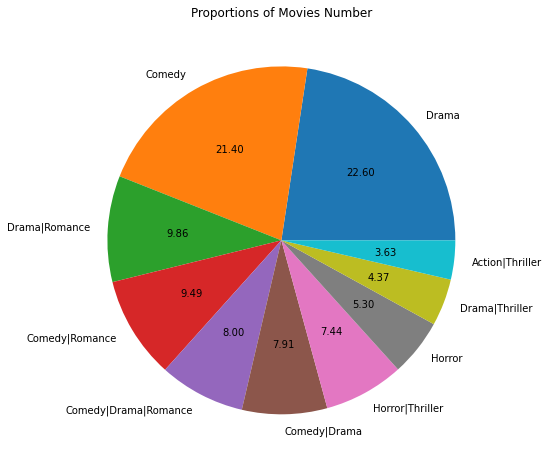

In [65]:
genres_count = df.genres.value_counts().values[:10]
labels = df.genres.value_counts().index[:10]
# pie chart of these genres number
pie_plot(genres_count, labels=labels, autopct='%.2f', title='Proportions of Movies Number')

### 2.Which year has the highest number of moveis?

In [29]:
df.release_year.value_counts()[:10]

2011    196
2013    179
2010    177
2009    170
2006    168
2014    165
2008    161
2015    160
2007    160
2005    159
Name: release_year, dtype: int64

Most of the movies in this dataset are released in 2011.

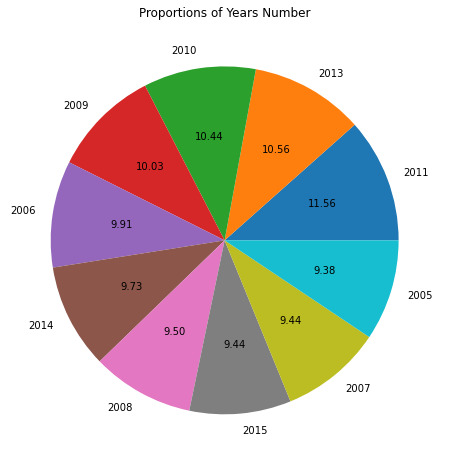

In [67]:
years_count = df.release_year.value_counts().values[:10]
labels = df.release_year.value_counts().index[:10]
# pie chart of these years number
pie_plot(years_count, labels=labels, autopct='%.2f', title='Proportions of Years Number')

### 3.What is the relation between number of years and movies?

In [31]:
# count the number of movies in each year then sort the result
movie_count_year = df['release_year'].value_counts().sort_index()
num_year = df.release_year.value_counts()

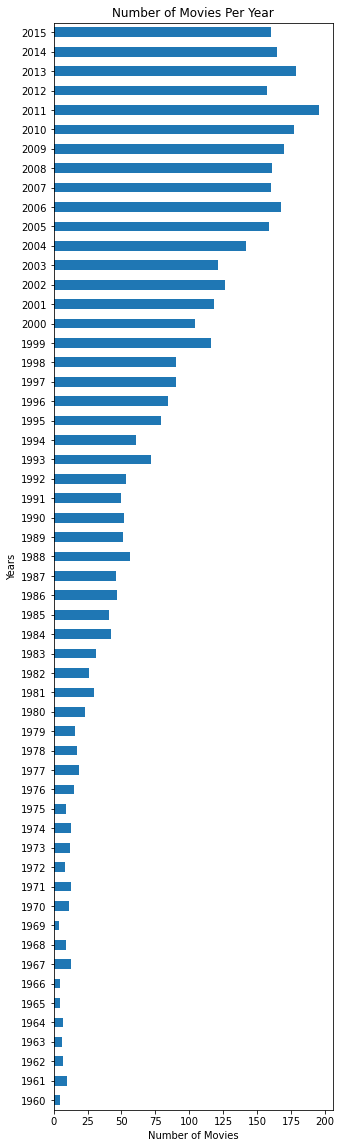

In [32]:
movie_count_year.plot(kind= 'barh', figsize = (5, 20))
plt.title('Number of Movies Per Year')
plt.xlabel('Number of Movies')
plt.ylabel('Years')
plt.show()

The number of movies increases over years.

**Which year released highest number of movies?**

From the plot in 2011 over 175 movies has been released.

### 4.Which production company released the most number movies over the years?

In [33]:
df.production_companies.value_counts()[:10]

Paramount Pictures                        77
Universal Pictures                        57
Columbia Pictures                         39
New Line Cinema                           38
Warner Bros.                              33
Metro-Goldwyn-Mayer (MGM)                 26
Touchstone Pictures                       24
Twentieth Century Fox Film Corporation    23
20th Century Fox                          22
Walt Disney Pictures                      22
Name: production_companies, dtype: int64

Paramount Pictures company has released the most number of movies.

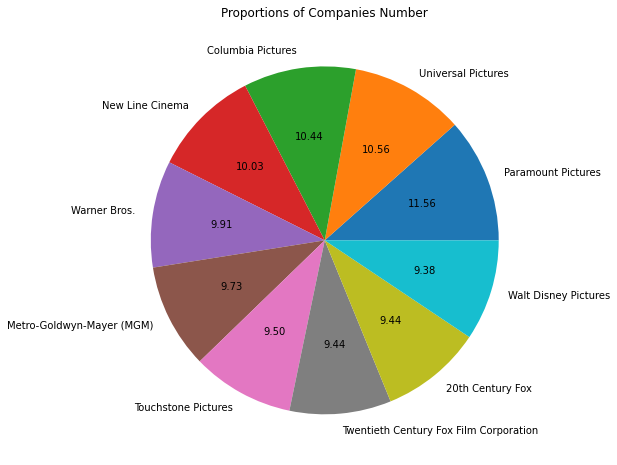

In [68]:
company_count = df.production_companies.value_counts().values[:10]
labels = df.production_companies.value_counts().index[:10]
# pie chart of proportions of these companyies 
pie_plot(years_count, labels=labels, autopct= '%.2f', title= 'Proportions of Companies Number')

### 5.How long time do movies take on average?

In [35]:
runtime_mean = df.runtime.mean()
print(runtime_mean)

109.35093249277647


In [36]:
# see some basic statistics for runtime column
df.runtime.describe()

count    3807.000000
mean      109.350932
std        19.845761
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

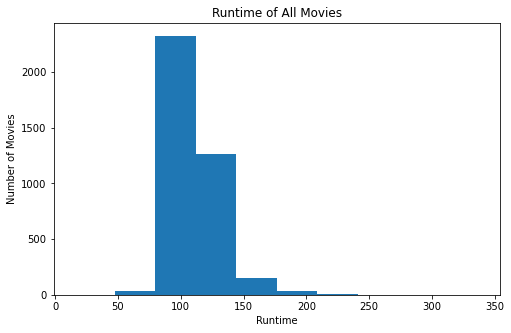

In [37]:
# histrogram for runtime and the number of movies

# figure size
plt.figure(figsize=(8,5))

# plot relationship between runtime and number of movies
plt.hist(df.runtime)

# histogram name
plt.title('Runtime of All Movies')

# x-axis name
plt.xlabel('Runtime')

# y-axis name
plt.ylabel('Number of Movies')
# show the histogram
plt.show()

These movies take 109.35 minute on average.

### 6.What is the relationship between popularity and vote count?

In [73]:
def scatter_plot(x, y, color=None, title=None, xlabel=None, ylabel=None):
    # figure size
    plt.figure(figsize=(8, 5))
    
    # draw scatter plot to see the relationship between two variables
    plt.scatter(x, y, color=color)
    
    # plot title
    plt.title(title)
    
    # x-axis name
    plt.xlabel(xlabel)
    
    # y-axis name
    plt.ylabel(ylabel)
    plt.show()

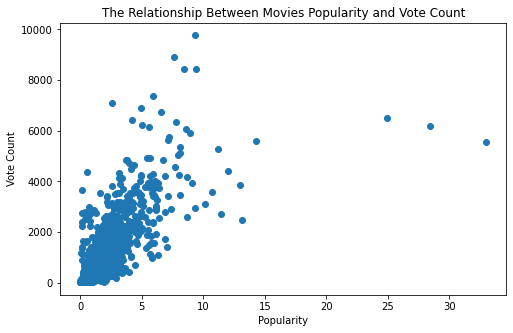

In [74]:
# Draw scatter plot to see the relationship between movies popularity and vote count.
scatter_plot(df.popularity, df.vote_count, title= 'The Relationship Between Movies Popularity and Vote Count',
            xlabel=  'Popularity', ylabel= 'Vote Count')

This makes sense since the increase in vote count causes an increase in popularity.

### 7.Does a bigger film production budget result in more revenue and popularity?

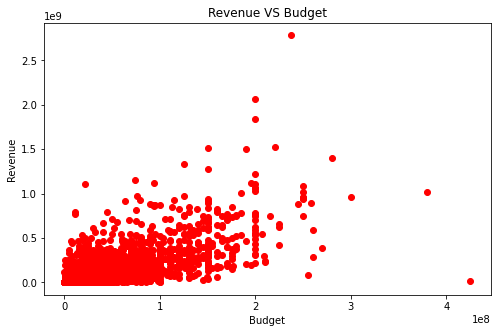

In [75]:
# Draw scatter plot between budget and revenue
scatter_plot(df.budget, df.revenue, color= 'r', title= 'Revenue VS Budget', xlabel= 'Budget', ylabel= 'Revenue'  )

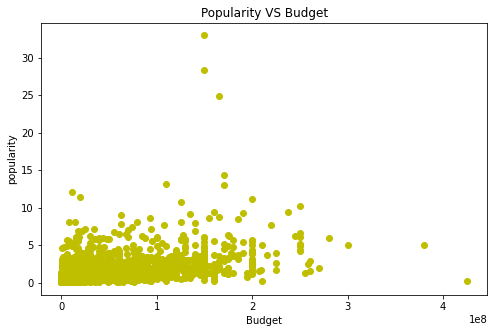

In [76]:
# draw scatter plot between budget and popularity
scatter_plot(df.budget, df.popularity, color='y', title='Popularity VS Budget', xlabel='Budget', ylabel='popularity')

The two graphs are positively correlated, and that means the more budget is, the more popularity and revenue are.


### 8. What is the status of movies rating over the years?

We will use to columns the release year column and vote_average column

I will use `groupby` to get the mean of vote_average for each year

In [41]:
avg_rating_year = df.groupby('release_year')['vote_average'].mean()

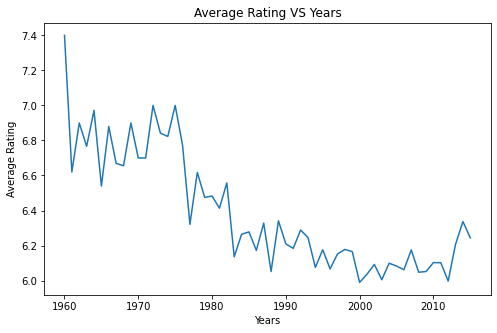

In [42]:
# plot the relationship between release year and vote average
avg_rating_year.plot(kind='line', title = 'Average Rating VS Years', figsize=(8, 5))
plt.xlabel('Years')
plt.ylabel('Average Rating')
plt.show()

- **The average rating of movies is getting worse over the years, which means the old movies get high ratings than the new ones.**

### 9.Which genres are most popular from year to year?

I want to split the years into intervals and get the most popular genre in this interval. I will use `cut` to split years into intervals.

In [43]:
year_levels = df.release_year.describe()[3:]

bin_edges = year_levels.tolist()
bin_edges = [int(year) for year in bin_edges]
bin_edges

[1960, 1995, 2004, 2010, 2015]

In [44]:
# Labels for the four years interval 
bin_names = ['1960:1995', '1995:2004', '2004:2010', '2010:2015']

In [45]:
df['years_intervals'] = pd.cut(df['release_year'], bins=bin_edges, labels=bin_names)

In [46]:
df.head(1)

popularity       budget       revenue  original_title         director  \
0   32.985763  150000000.0  1.513529e+09  Jurassic World  Colin Trevorrow   

   runtime                                     genres  \
0    124.0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   

   vote_average  release_year    budget_adj   revenue_adj years_intervals  
0           6.5          2015  1.379999e+08  1.392446e+09       2010:2015

In [47]:
df.isnull().sum().sum()

5

In [48]:
df.dropna(inplace=True)

In [49]:
df.isnull().sum().sum()

0

Now, I will use `groupby` to get the most popular genres in each interval.

In [50]:
count_genres_interval = df.groupby(['years_intervals', 'genres'] , as_index= False)['popularity'].mean()

In [51]:
count_genres_interval.isnull().sum()

years_intervals       0
genres                0
popularity         2555
dtype: int64

In [52]:
# We get nan values since there is genres that don't exist in all intervals.
count_genres_interval.dropna(inplace= True)

In [53]:
most_popular_genres = []
max_popularity = []
intervals = df.years_intervals.unique()
for interval in intervals:
    filter_by_interval = count_genres_interval.loc[count_genres_interval.years_intervals == interval]
    most_popular_genres.append(filter_by_interval.genres[filter_by_interval.popularity.idxmax()])
    max_popularity.append(filter_by_interval.popularity.max())

Here we get the most popular genres and their popularity value.

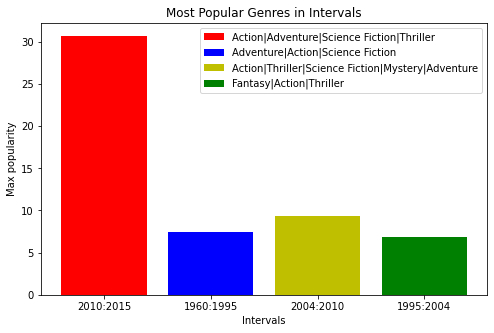

In [54]:
plt.figure(figsize=(8, 5))
color=['r', 'b', 'y', 'g']
for index in range(len(most_popular_genres)):
    plt.bar(x= df.years_intervals.unique()[index], height= max_popularity[index],
        color=color[index], label=most_popular_genres[index])
    plt.xticks(df.years_intervals.unique())
    plt.legend(loc='best')
plt.xlabel('Intervals')
plt.ylabel('Max popularity')
plt.title('Most Popular Genres in Intervals')
plt.show()

In [55]:
count_genres_interval.genres[count_genres_interval.popularity.idxmax()]

'Action|Adventure|Science Fiction|Thriller'

- From 1960 to 1995, the most popular genres is  Action|Adventure|Science Fiction|Thriller
- From 1995 to 2004, the most popular genres is  Adventure|Action|Science Fiction
- From 2004 to 2010, the most popular genres is  Action|Thriller|Science Fiction|Mystery|Adventure
- From 2010 to 2015, the most popular genres is  Fantasy|Action|Thriller

Action|Adventure|Science Fiction|Thriller is the most popular genres in all intervals.

### 10.What kinds of properties are associated with movies that have high revenues?

In [56]:
df.head(1)

popularity       budget       revenue  original_title         director  \
0   32.985763  150000000.0  1.513529e+09  Jurassic World  Colin Trevorrow   

   runtime                                     genres  \
0    124.0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   

   vote_average  release_year    budget_adj   revenue_adj years_intervals  
0           6.5          2015  1.379999e+08  1.392446e+09       2010:2015

In [57]:
revenue_mean = df.revenue.mean()
high_revenue = df.query('revenue > @revenue_mean')

In [58]:
high_revenue.head()

popularity       budget       revenue                original_title  \
0   32.985763  150000000.0  1.513529e+09                Jurassic World   
1   28.419936  150000000.0  3.784364e+08            Mad Max: Fury Road   
2   13.112507  110000000.0  2.952382e+08                     Insurgent   
3   11.173104  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4    9.335014  190000000.0  1.506249e+09                     Furious 7   

           director  runtime                                     genres  \
0   Colin Trevorrow    124.0  Action|Adventure|Science Fiction|Thriller   
1     George Miller    120.0  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke    119.0         Adventure|Science Fiction|Thriller   
3       J.J. Abrams    136.0   Action|Adventure|Science Fiction|Fantasy   
4         James Wan    137.0                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15        5292   
4  Universal Pictures|Original Film|Media Rights ...   2015-04-01        2947   

   vote_average  release_year    budget_adj   revenue_adj years_intervals  
0           6.5          2015  1.379999e+08  1.392446e+09       2010:2015  
1           7.1          2015  1.379999e+08  3.481613e+08       2010:2015  
2           6.3          2015  1.012000e+08  2.716190e+08       2010:2015  
3           7.5          2015  1.839999e+08  1.902723e+09       2010:2015  
4           7.3          2015  1.747999e+08  1.385749e+09       2010:2015

In [59]:
high_revenue.director.value_counts()

Steven Spielberg                 23
Robert Zemeckis                  12
Ridley Scott                     10
Michael Bay                      10
Clint Eastwood                   10
                                 ..
Gareth Edwards                    1
Richard Marquand                  1
Jon Amiel                         1
Peter Farrelly|Bobby Farrelly     1
NimrÃ³d Antal                     1
Name: director, Length: 522, dtype: int64

Most of these movies are made by Steven Spielberg

In [60]:
high_revenue.production_companies.value_counts()[:10]

Paramount Pictures                                    22
DreamWorks Animation                                  13
Walt Disney Pictures|Pixar Animation Studios          13
Universal Pictures                                    13
Eon Productions                                       10
Walt Disney Pictures                                   9
Walt Disney Pictures|Walt Disney Feature Animation     9
Columbia Pictures                                      8
Imagine Entertainment|Universal Pictures               8
Marvel Studios                                         8
Name: production_companies, dtype: int64

Most of these movies are produced by Paramount Pictures.

In [61]:
high_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 10760
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            1092 non-null   float64       
 1   budget                1092 non-null   float64       
 2   revenue               1092 non-null   float64       
 3   original_title        1092 non-null   object        
 4   director              1092 non-null   object        
 5   runtime               1092 non-null   float64       
 6   genres                1092 non-null   object        
 7   production_companies  1092 non-null   object        
 8   release_date          1092 non-null   datetime64[ns]
 9   vote_count            1092 non-null   int64         
 10  vote_average          1092 non-null   float64       
 11  release_year          1092 non-null   int64         
 12  budget_adj            1092 non-null   float64       
 13  revenue_adj      

In [62]:
high_revenue.release_year.value_counts()[:25]

2011    67
2013    59
2014    59
2012    56
2010    55
2008    51
2015    48
2006    46
2004    46
2003    46
2007    45
2009    45
2005    42
2002    40
2000    36
1997    35
2001    32
1998    30
1999    29
1995    28
1996    25
1993    21
1994    20
1992    16
1989    13
Name: release_year, dtype: int64

Most of the movies with high revenue are released in the interval from 1995 to 2011.

In [63]:
high_revenue.describe()

popularity        budget       revenue      runtime   vote_count  \
count  1092.000000  1.092000e+03  1.092000e+03  1092.000000  1092.000000   
mean      2.202657  7.465807e+07  2.959808e+08   115.624542  1251.977106   
std       2.224026  5.464514e+07  2.413990e+08    21.172117  1285.774769   
min       0.131526  1.130000e+02  1.094236e+08    72.000000    14.000000   
25%       1.074580  3.500000e+07  1.509260e+08    99.750000   393.250000   
50%       1.617808  6.000000e+07  2.119945e+08   113.000000   792.500000   
75%       2.564112  1.000000e+08  3.489863e+08   128.000000  1658.750000   
max      32.985763  3.800000e+08  2.781506e+09   201.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   1092.000000   1092.000000  1.092000e+03  1.092000e+03  
mean       6.390842   2003.288462  8.366946e+07  3.595926e+08  
std        0.708161      9.443068  5.437873e+07  2.940109e+08  
min        4.200000   1961.000000  2.248029e+02  1.029637e+08  
25%        5.900000   1998.000000  4.162841e+07  1.761617e+08  
50%        6.400000   2005.000000  7.273568e+07  2.595131e+08  
75%        6.900000   2011.000000  1.146804e+08  4.323176e+08  
max        8.300000   2015.000000  3.683713e+08  2.827124e+09

**The properties of movies that have high revenue**
- Most of these movies are produced by Paramount Pictures.
- Most of the movies are released in the interval from 1995 to 2011.
- Most of these movies are directed by Steven Spielberg.
- The movies have a high budget.
- Runtime doesn't exceed 201 and not less than 72.
- The vote count doesn't exceed 9767 and this is the maximum number of the vote counts.

<a id='conclusions'></a>
## Conclusions

After digging deep into these data, do some statistical analysis, and answer some question, here they are the insights I got:  
- Most of the movies in this dataset are comedy and drama movies.
- In 2011 over 175 movies have been released, and this the most number of movies released in a specific year.
- The number of movies increases over years.
- Paramount Pictures company has released the most number of movies.
- These movies take 109.35 minute on average.
- The popularity and revenue are increases with the budget of the movie. The more budget is, the more popularity and revenue are
- The average rating of movies is getting worse over the years, which means the old movies get high ratings than the new ones.
- From 1960 to 1995, the most popular genres is Action|Adventure|Science Fiction|Thriller
- From 1995 to 2004, the most popular genres is Adventure|Action|Science Fiction
- From 2004 to 2010, the most popular genres is Action|Thriller|Science Fiction|Mystery|Adventure
- From 2010 to 2015, the most popular genres is Fantasy|Action|Thriller
- Action|Adventure|Science Fiction|Thriller is the most popular genres in all intervals.
- The increase in vote count causes an increase in popularity.
- **The properties of movies that have high revenue**

   - Most of these movies are produced by Paramount Pictures.
   - Most of the movies are released in the interval from 1995 to 2011.
   - Most of these movies are directed by Steven Spielberg.
   - The movies have a high budget.
   - Runtime doesn't exceed 201 and not less than 72.
   - The vote count doesn't exceed 9767 and this is the maximum number of the vote counts.
   
 **Limitations**
- All insights are limited to the underlying data set, and they can't be generalized. Taking into account, a large number of entries have been removed due to missing values.

#### Some Important Graphs

- **Most of the movies in this dataset are comedy and drama movies.**
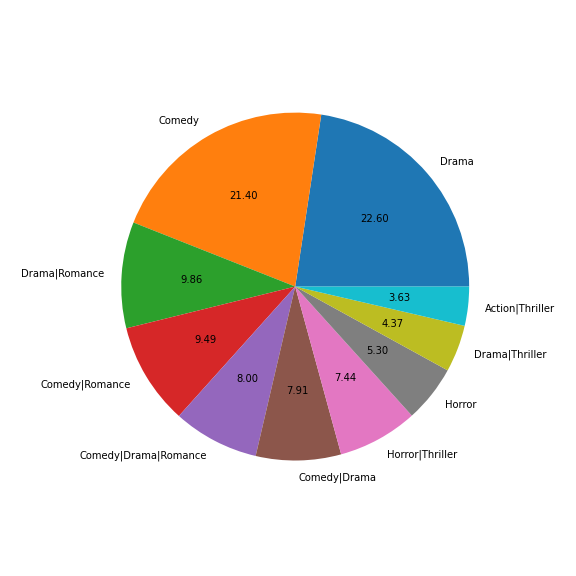

- **These movies take 109.35 minute on average.**
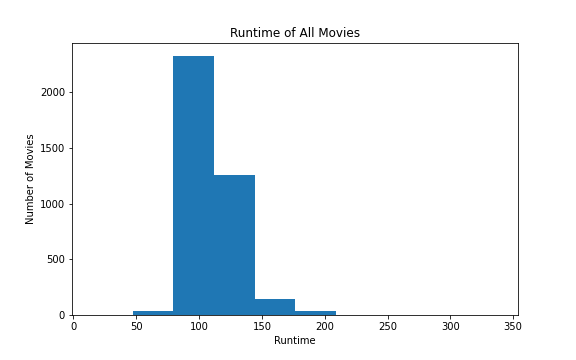

- **The popularity and revenue are increases with the budget of the movie. The more budget is, the more popularity and revenue are**
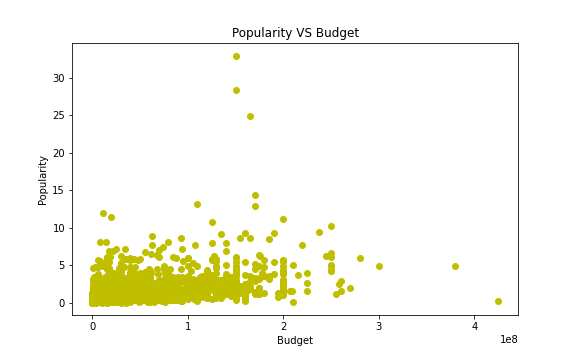

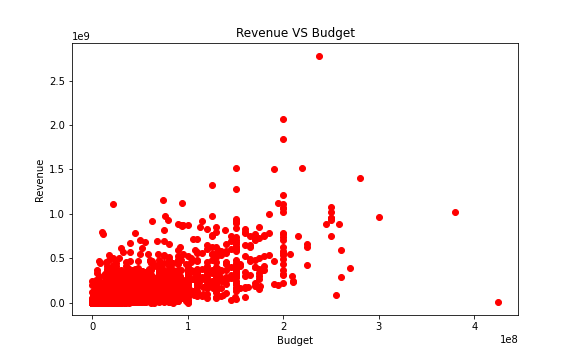

- **The average rating of movies is getting worse over the years, which means the old movies get high ratings than the new ones.**
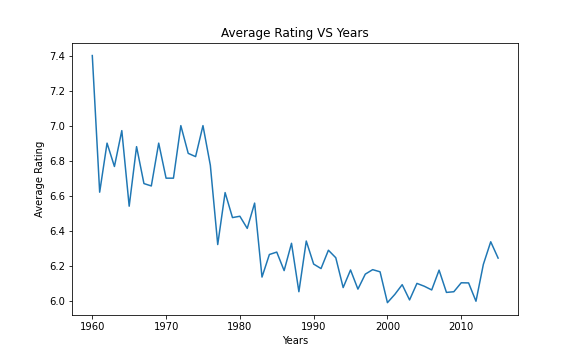